**CIFAR-10 Photo Classification Dataset**

CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

0: airplane

1: automobile

2: bird

3: cat

4: deer

5: dog

6: frog

7: horse

8: ship

9: truck

# **Load dataset and visualization**

In [1]:
#load dataset and visualization

# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(X_train_0, y_train_0), (X_test_0, y_test_0) = cifar10.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train_0.shape, y_train_0.shape))
print('Test: X=%s, y=%s' % (X_test_0.shape, y_test_0.shape))

170508288/170498071 [==============================] - 15s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


# **Normalization of Data**

In [2]:
X_train, X_test = X_train_0.astype('float32')/255.0, X_test_0.astype('float32')/255.0

# **y: Convert to Categorical**

In [3]:
#from keras.utils import np_utils as utils
# One-Hot-Encoding

#y_train, y_test = utils.to_categorical(y_train_0, 10), utils.to_categorical(y_test_0, 10)
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(y_train_0)
y_train = one_hot_encoder.transform(y_train_0)
y_test = one_hot_encoder.transform(y_test_0)

# **Build Transfer learning Model**

In [11]:
#from keras.applications.resnet50 import ResNet50, preprocess_input
#from keras.applications.xception import Xception
from keras.applications.densenet import DenseNet201, DenseNet169
from keras.callbacks import EarlyStopping
#from keras.applications.mobilenet import MobileNet
#from keras.applications.inception_v3 import InceptionV3

from keras.layers import GlobalMaxPooling2D, Dense, Flatten, Dropout, Flatten, GlobalAveragePooling2D, AveragePooling2D
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop


In [5]:
earlystopping = EarlyStopping(verbose=1,
                              monitor='val_loss',
                              restore_best_weights=True,
                              patience=3,
                              min_delta=0)
callbacks = [earlystopping]

# Model: DenseNet201

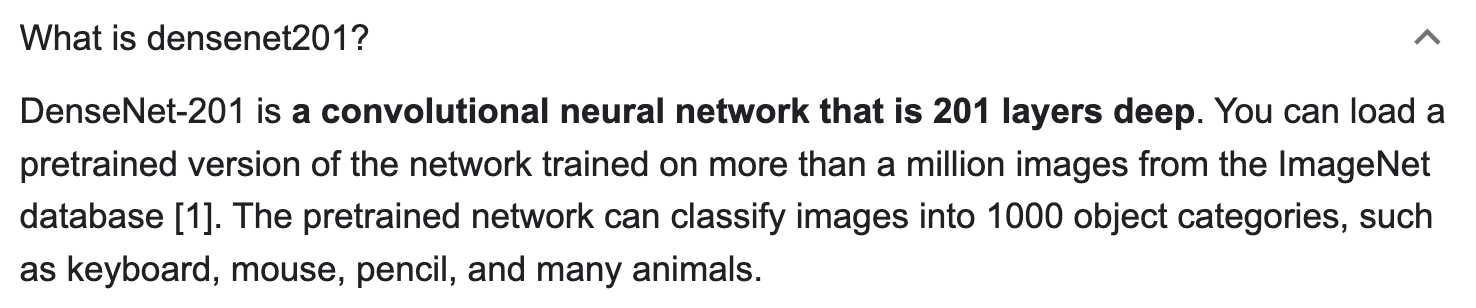

### Build model

In [37]:
model = DenseNet201(include_top=False, weights = 'imagenet', input_shape=(32, 32, 3))

# mark loaded layers as not trainable
for layer in model.layers:
	layer.trainable = False

# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(512, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model_DenseNet201 = Model(inputs=model.inputs, outputs=output)

model_DenseNet201.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(learning_rate=0.001),
             #optimizer='adam',
             metrics=['accuracy']
              )

model_DenseNet201.fit(X_train, y_train, 
                      validation_data=(X_test, y_test), 
                      epochs=5,
                      batch_size=512)

Epoch 1/5
98/98 [==============================] - 22s 130ms/step - loss: 1.4968 - accuracy: 0.4938 - val_loss: 1.2083 - val_accuracy: 0.5737
Epoch 2/5
98/98 [==============================] - 9s 95ms/step - loss: 1.1450 - accuracy: 0.5976 - val_loss: 1.2081 - val_accuracy: 0.5758
Epoch 3/5
98/98 [==============================] - 9s 95ms/step - loss: 1.0252 - accuracy: 0.6408 - val_loss: 1.1384 - val_accuracy: 0.5958
Epoch 4/5
98/98 [==============================] - 10s 107ms/step - loss: 0.9396 - accuracy: 0.6708 - val_loss: 1.1310 - val_accuracy: 0.6072
Epoch 5/5
98/98 [==============================] - 10s 106ms/step - loss: 0.8663 - accuracy: 0.6972 - val_loss: 1.0398 - val_accuracy: 0.6423


## Evaluation

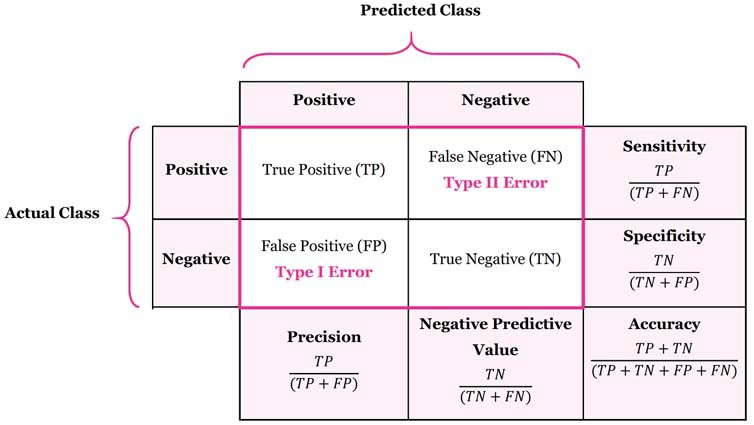

In [38]:
# evaluate model by accuracy
_, acc = model_DenseNet201.evaluate(X_test, y_test, verbose=0)
print(acc)

0.642300009727478


## **Prediction**


In [39]:
y_pred_ = model_DenseNet201.predict(X_test)
y_pred_

array([[2.60556359e-02, 1.25519916e-01, 4.39480208e-02, ...,
        2.56356448e-02, 2.21084915e-02, 1.03843501e-02],
       [1.06690370e-03, 8.70405813e-04, 2.17195600e-04, ...,
        1.22176498e-04, 9.95516598e-01, 6.06763584e-04],
       [1.14795014e-01, 3.73475999e-02, 3.05138389e-03, ...,
        3.71582396e-02, 5.94508588e-01, 9.30568483e-03],
       ...,
       [2.64268874e-06, 8.44236201e-05, 2.91861631e-02, ...,
        1.31910443e-01, 1.88058722e-04, 6.72227980e-05],
       [1.71579674e-01, 5.96644767e-02, 5.55296719e-01, ...,
        1.64975028e-03, 6.63239807e-02, 7.64904951e-04],
       [1.67289090e-05, 3.84506129e-05, 8.78670617e-05, ...,
        9.87138152e-01, 4.34733352e-07, 5.10762547e-05]], dtype=float32)

In [40]:
y_pred_ohe = one_hot_encoder.inverse_transform(y_pred_)

In [41]:
y_pred_ohe

array([[3],
       [8],
       [8],
       ...,
       [5],
       [2],
       [7]], dtype=uint8)

In [42]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [43]:
y_test_ohe = one_hot_encoder.inverse_transform(y_test)
y_test_ohe

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [44]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


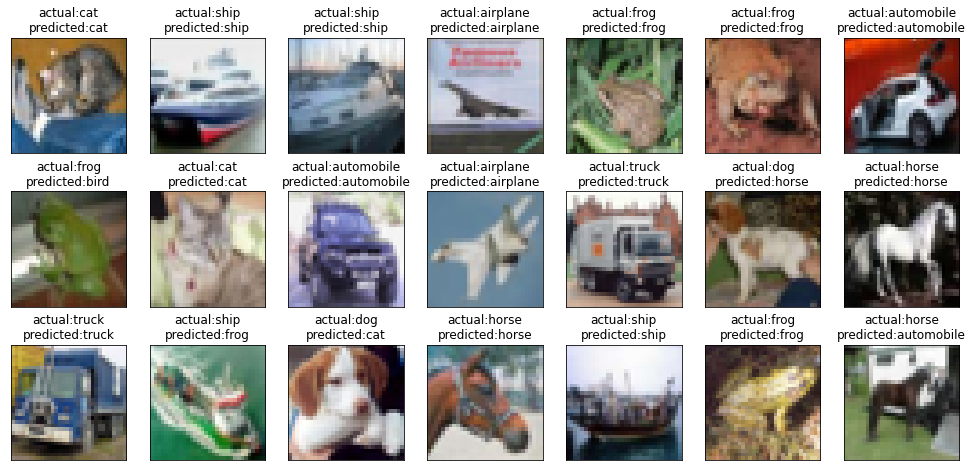

In [45]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test_ohe[index][0]] + '\n' 
                            + 'predicted:' + labels[y_pred_ohe[index][0]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

## **Plot confusion matrix**

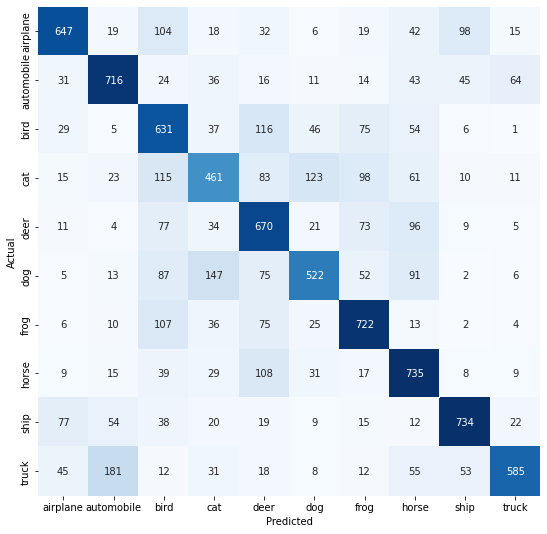

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_ohe, y_pred_ohe)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test_ohe, y_pred_ohe))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69      1000
           1       0.69      0.72      0.70      1000
           2       0.51      0.63      0.56      1000
           3       0.54      0.46      0.50      1000
           4       0.55      0.67      0.61      1000
           5       0.65      0.52      0.58      1000
           6       0.66      0.72      0.69      1000
           7       0.61      0.73      0.67      1000
           8       0.76      0.73      0.75      1000
           9       0.81      0.58      0.68      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000



## Save Model to JSON, YAML, HDF5

In [49]:
#Access to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
base_folder = "/content/drive/My Drive/Colab Notebooks/"
model.save(base_folder + 'result/TL_DenseNet201_CIFAR.h5')

In [52]:
from tensorflow.keras.models import load_model

model_TL_DenseNet201= load_model(base_folder + 'TL_DenseNet201_CIFAR.h5')

## Convert h5 to tensorflowlite

In [55]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model_TL_DenseNet201)
tflite_model = converter.convert()
open(base_folder + 'result/TL_DenseNet201_CIFAR.tflite', "wb").write(tflite_model)

72492976